In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection

from sklearn import preprocessing

In [2]:
train = np.loadtxt('training_boston_x_y_train.csv', delimiter = ',')
test = np.loadtxt('test_boston_x_test.csv', delimiter = ',')

In [3]:
print(datasets.load_boston().DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
def cost(x, y ,m):
    M = len(x)
    cost = 0
    for i in range(M):
        cost+= (1/(2*M))*((y[i]-sum(m*x[i]))**2)
    return cost


def step_gradient(x , y , lr, m):
    m_slope= np.zeros(len(x[0])) 
    
    
    M = len(x)
    for i in range(M):
        X = x[i]
        Y = y[i]
        for j in range(len(X)):
            m_slope[j] += (-1/M)*(Y-sum(m*X))*X[j]

    new_m = m - (lr*m_slope)
    return new_m


def gd(x,y , lr , num):
    m = np.zeros(len(x[0]))
    
    for i in range(num):
        m = step_gradient(x,y, lr , m )
        print(i, "Cost: ", cost(x,y,m))
        plt.scatter(i,cost(x,y,m))
    plt.xlabel('Number of Features')
    plt.ylabel('Cost Function Value')
    plt.show()
    
    return m


In [165]:
x = test.copy()

In [7]:
def run(train,test):
    x = train[:,:-1]
    y = []
    
    #Feature Engg
    for i in range(len(x[0])):
        for j in range(i,len(x[0])):
            y.append(x[:,i]*x[:,j] )
            
    y = np.array(y)
    
    for i in y:
        x = np.append(x, i.reshape(-1,1), axis =1) 
    
    x  = np.append(x, (x[:,9]**3).reshape(-1,1) , axis = 1)
    x  = np.append(x, (x[:,10]**3).reshape(-1,1) , axis = 1)
    x  = np.append(x, (x[:,11]**3).reshape(-1,1) , axis = 1)
    x  = np.append(x, (x[:,12]**3).reshape(-1,1) , axis = 1)
    x  = np.append(x, (x[:,0]**3).reshape(-1,1) , axis = 1)
    x  = np.append(x, (x[:,1]**3).reshape(-1,1) , axis = 1)
    x  = np.append(x, (x[:,2]**3).reshape(-1,1) , axis = 1)
    x  = np.append(x, (x[:,3]**3).reshape(-1,1) , axis = 1)
    
    #Feature Scaling
    scaler = preprocessing.StandardScaler()
    scaler.fit(x)
    x = scaler.transform(x)
    
    x = np.append(x, np.ones(len(x)).reshape(-1,1), axis = 1)
    
    y= train[:,-1]
    lr = 0.08
    num = 300
    m = gd(x,y,lr,num)
    
    y = []
    
    for i in range(len(test[0])):
        for j in range(i,len(test[0])):
            y.append(test[:,i]*test[:,j] )
            
    y = np.array(y)
    for i in y:
        test = np.append(test, i.reshape(-1,1), axis =1)
    
    test  = np.append(test, (test[:,9]**3).reshape(-1,1) , axis = 1)
    test  = np.append(test, (test[:,10]**3).reshape(-1,1) , axis = 1)
    test  = np.append(test, (test[:,11]**3).reshape(-1,1) , axis = 1)
    test  = np.append(test, (test[:,12]**3).reshape(-1,1) , axis = 1)
    test  = np.append(test, (test[:,0]**3).reshape(-1,1) , axis = 1)
    test  = np.append(test, (test[:,1]**3).reshape(-1,1) , axis = 1)
    test  = np.append(test, (test[:,2]**3).reshape(-1,1) , axis = 1)
    test  = np.append(test, (test[:,3]**3).reshape(-1,1) , axis = 1)
    

    test1 = scaler.transform(test)
    x_test = np.append(test1,np.ones(len(test1)).reshape(-1,1), axis = 1)
    
    y_pred = []
    for i in x_test:
        y_pred.append(sum(i*m))
        
    y_pred = np.array(y_pred)
    return y_pred

0 Cost:  239.51876702475508
1 Cost:  200.31640593277132
2 Cost:  169.29355026988975
3 Cost:  143.72132518149326
4 Cost:  122.3459417627157
5 Cost:  104.37556784850872
6 Cost:  89.22595381072117
7 Cost:  76.43431069095668
8 Cost:  65.62241221174709
9 Cost:  56.476695835331846
10 Cost:  48.73536121940359
11 Cost:  42.17897117604718
12 Cost:  36.62315478574629
13 Cost:  31.912752175617662
14 Cost:  27.91703244934748
15 Cost:  24.525748340620773
16 Cost:  21.64586054559125
17 Cost:  19.198806436521814
18 Cost:  17.118215713135363
19 Cost:  15.347995484763912
20 Cost:  13.840722212425677
21 Cost:  12.556289471794862
22 Cost:  11.46076958791585
23 Cost:  10.525454465387789
24 Cost:  9.726046822358494
25 Cost:  9.041977839286778
26 Cost:  8.455831179640168
27 Cost:  7.952856599691698
28 Cost:  7.520559069293171
29 Cost:  7.148351577289989
30 Cost:  6.827261675188259
31 Cost:  6.549683385744418
32 Cost:  6.30916742184061
33 Cost:  6.1002437681258375
34 Cost:  5.918271608533693
35 Cost:  5.7593

282 Cost:  3.4062737515055024
283 Cost:  3.404536808513124
284 Cost:  3.402808794597783
285 Cost:  3.4010896432632602
286 Cost:  3.3993792887298877
287 Cost:  3.397677665923966
288 Cost:  3.395984710467448
289 Cost:  3.394300358667781
290 Cost:  3.392624547507956
291 Cost:  3.390957214636715
292 Cost:  3.3892982983589794
293 Cost:  3.3876477376263874
294 Cost:  3.3860054720280948
295 Cost:  3.3843714417816613
296 Cost:  3.3827455877241244
297 Cost:  3.3811278513032748
298 Cost:  3.379518174569024
299 Cost:  3.3779165001649796


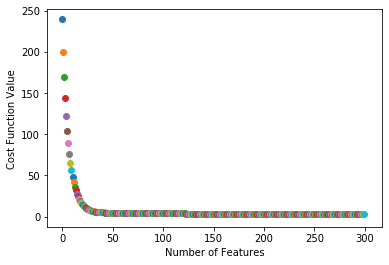

In [8]:
y_pred = run(train,test)

In [10]:
np.savetxt("y_pred.csv",y_pred,delimiter=",",fmt = '%10f')